# t test

In [9]:
import numpy as np
import pandas as pd

from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [7]:
lead=pd.read_csv('lead.csv')
lead.head()

,id,ageyrs,Group,maxfwt
0,101,11.08,1,72
1,102,9.42,1,61
2,103,11.08,1,49
3,104,6.92,1,48
4,105,11.25,1,51


In [4]:
grp1 = lead.loc[lead.Group==1, 'maxfwt']
grp2 = lead.loc[lead.Group==2, 'maxfwt']

In [5]:
from scipy import stats

statistics1, pvalue1 = stats.ttest_ind(grp1, grp2)
print(pvalue1)
print(pvalue1/2)
print(1-pvalue1/2)

0.5180464065257764
0.2590232032628882
0.7409767967371118


# 공분산 분석

Text(0, 0.5, 'maxfwt')

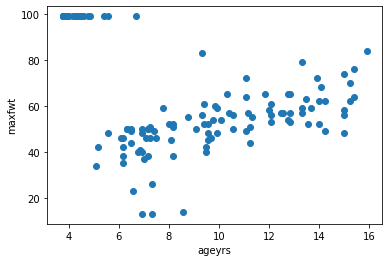

In [10]:
plt.scatter(lead.ageyrs, lead.maxfwt)
plt.xlabel('ageyrs')
plt.ylabel('maxfwt')

평균

In [11]:
lead['ageyrs'].groupby(lead['Group']).mean()

Group
1    9.327308
2    8.269783
Name: ageyrs, dtype: float64

In [12]:
lead['maxfwt'].groupby(lead['Group']).mean()

Group
1    62.435897
2    59.760870
Name: maxfwt, dtype: float64

# 카이제곱

In [13]:
ABtesting=pd.read_csv('ABtesting.csv')
ABtesting.head()

,A,B
0,Y,Y
1,Y,Y
2,Y,Y
3,Y,Y
4,Y,Y


In [14]:
table1=ABtesting.melt(var_name='grp', value_name='ny')
table1.head()

,grp,ny
0,A,Y
1,A,Y
2,A,Y
3,A,Y
4,A,Y


In [15]:
table2=pd.crosstab(table1['grp'], table1['ny'])
table2

ny,N,Y
grp,,
A,900,100
B,850,150


In [16]:
from scipy import stats

In [17]:
chi2, pvalue, dof, expected = stats.chi2_contingency(table2)
pvalue

0.0009229943590897624

# t - test

In [18]:
weightloss=pd.read_csv('weightloss.csv')
weightloss.head()

,patient,before,after
0,1,94,85
1,2,101,99
2,3,90,90
3,4,92,81
4,5,88,87


In [19]:
stats.ttest_rel(weightloss['before'], weightloss['after'])

Ttest_relResult(statistic=6.043987931415662, pvalue=1.4118135578371482e-06)

# McNemar test

In [20]:
from statsmodels.stats.contingency_tables import mcnemar

In [21]:
poll=pd.read_csv('poll.csv', index_col=0)
poll.head()

,Y_Jan,Y_Aug
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1


In [22]:
change = {'Y_Jan' : {1: "선호", 0: "비선호"},
         'Y_Aug' : {1: "선호", 0: "비선호"}}

poll2=poll.replace(change)
poll2.head()

,Y_Jan,Y_Aug
1,선호,선호
2,선호,선호
3,선호,선호
4,선호,선호
5,선호,선호


In [23]:
table=pd.crosstab(poll2['Y_Jan'], poll2['Y_Aug'], 
                  rownames=['1월'], colnames=['8월'])
table

8월,비선호,선호
1월,,
비선호,55,25
선호,45,75


In [24]:
table2=table.reindex(['선호', '비선호'], axis='index')
table2=table2.reindex(['선호', '비선호'], axis='columns')
table2

8월,선호,비선호
1월,,
선호,75,45
비선호,25,55


In [25]:
result = mcnemar(table2)
print(result)

pvalue      0.0224628954925093
statistic   25.0


In [26]:
result.pvalue

0.0224628954925093